# Brain Tumor Segmentation on BraTS 2020 Dataset Using an Attention-Enhanced U-Net Model

**Importing the Libraries** 

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
import nibabel as nib
import cv2 as cv
import matplotlib.pyplot as plt

import tensorflow
import keras
from keras.models import load_model
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers 
from keras import backend as K
from tensorflow.keras.layers import Add, Conv2D, MaxPooling2D, UpSampling2D, Input, BatchNormalization, Activation, concatenate


import glob
import skimage.io as io
import skimage.color as color
import random as r
import math
from nilearn import plotting
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        (os.path.join(dirname, filename))

# **BraTs2020 Data Visualization**
**In this section, I extract a dataset from Brats2020 and visualize it to examine the input data.**

In [3]:
Flair= nib.load('../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_003/BraTS20_Training_003_flair.nii')
T1= nib.load('../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_003/BraTS20_Training_003_t1.nii')
T1ce= nib.load('../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_003/BraTS20_Training_003_t1ce.nii')
T2= nib.load('../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_003/BraTS20_Training_003_t2.nii')

# Brain tumor segmented image
Seg= nib.load('../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_003/BraTS20_Training_003_seg.nii')


**VISUALIZATION USING PLOT_ANAT**


`plot_anat` is a function from the **Nilearn** library, which is a Python package used for the analysis of neuroimaging data, especially functional MRI (fMRI), structural MRI (sMRI), and other related imaging modalities.

The `plot_anat` function is used to **visualize anatomical brain images**, typically in the form of MRI scans. It can plot a 3D view of a structural brain image (for example, T1-weighted MRI scans) with different visualization options, such as:

- Displaying axial, coronal, or sagittal views.
- Customizing the colormap, display range, and background color.
- Adding labels, contours, and annotations for various brain regions or features.

It is commonly used in neuroimaging workflows to quickly examine anatomical images and to ensure that they have been preprocessed or registere xplore MRI data.

**Fluid-attenuated inversion recovery (FLAIR) :**

**FLAIR is an MRI sequence designed to nullify the signal from fluids. For instance, in brain imaging, it is used to suppress the effects of cerebrospinal fluid (CSF) on the image, enhancing the visibility of periventricular hyperintense lesions, such as multiple sclerosis (MS) plaques.**

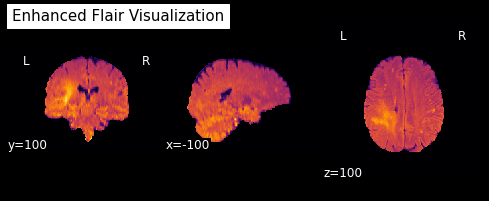

In [4]:
from nilearn import plotting

# Centered around meaningful anatomical landmarks
better_cut_coords = [-100, 100, 100]  

plotting.plot_anat(
    Flair,
    cut_coords=better_cut_coords,  
    title="Enhanced Flair Visualization",
    draw_cross=False, 
    cmap="inferno", 
    annotate=True,  
    black_bg=True, 
    dim=-0.5, 
)

**T1-Weighted Image (T1):**
T1-weighted imaging is a type of MRI sequence that provides high contrast between tissues based on their T1 relaxation times. These images highlight fat as bright (hyperintense) and water-containing tissues as dark (hypointense). T1 images are commonly used to evaluate anatomical structures, detect structural abnormalities, and assess contrast enhancement following the administration of gadolinium-based contrast agents.

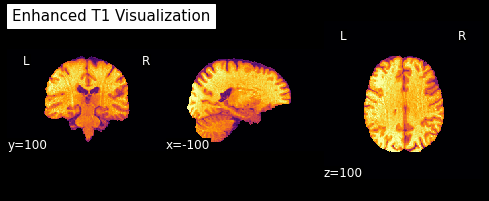

In [5]:
from nilearn import plotting

# Adjust coordinates for relevant slices
better_cut_coords = [-100, 100, 100] 
plotting.plot_anat(
    T1,
    cut_coords=better_cut_coords,  
    title="Enhanced T1 Visualization", 
    draw_cross=False, 
    cmap="inferno", 
    annotate=True, 
    black_bg=True, 
    dim=-0.5,
)


**T1-Weighted Contrast-Enhanced (T1ce) Image:**

T1ce imaging refers to T1-weighted MRI images acquired after the injection of a gadolinium-based contrast agent. This contrast agent enhances areas with increased vascularity or disrupted blood-brain barrier, making abnormalities such as tumors, inflammation, or active lesions more visible. T1ce is commonly used in brain imaging to identify enhancing regions indicative of pathologies like gliomas or metastases.

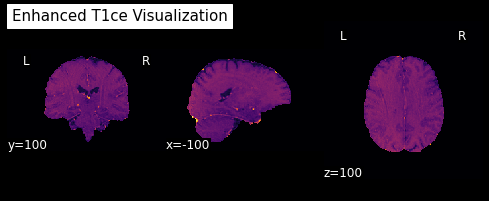

In [6]:
from nilearn import plotting

 # Adjust coordinates for relevant slices
better_cut_coords = [-100, 100, 100] 
plotting.plot_anat(
    T1ce,
    cut_coords=better_cut_coords, 
    title="Enhanced T1ce Visualization", 
    draw_cross=False, 
    cmap="inferno",  
    annotate=True, 
    black_bg=True, 
    dim=-0.5,  
)


**T2-Weighted Image (T2):**

T2-weighted imaging is an MRI sequence that emphasizes the differences in T2 relaxation times between tissues. In T2 images, fluids, such as cerebrospinal fluid (CSF), appear bright (hyperintense), while fat and other dense tissues appear darker (hypointense). These images are particularly useful for detecting edema, inflammation, and other fluid-related abnormalities, making them valuable for identifying brain lesions, tumors, and other pathological conditions.d.**

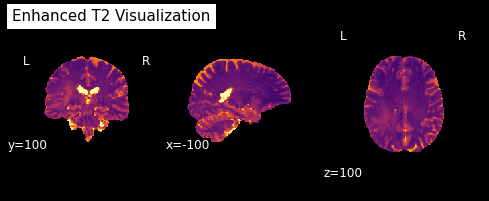

In [7]:
from nilearn import plotting

 # Adjust coordinates for relevant slices
better_cut_coords = [-100, 100, 100] 
plotting.plot_anat(
    T2,
    cut_coords=better_cut_coords, 
    title="Enhanced T2 Visualization", 
    draw_cross=False,  
    cmap="inferno",
    annotate=True, 
    black_bg=True,
    dim=-0.5, 
)


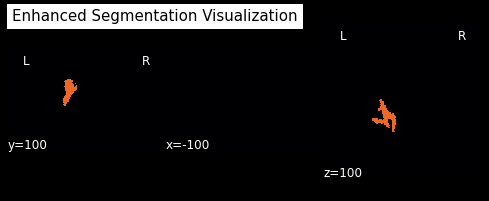

In [8]:
from nilearn import plotting

# Adjust coordinates for relevant slices
better_cut_coords = [-100, 100, 100]  
plotting.plot_anat(
    Seg,
    cut_coords=better_cut_coords, 
    title="Enhanced Segmentation Visualization", 
    draw_cross=False,  
    cmap="inferno",  
    annotate=True,  
    black_bg=True, 
    dim=-0.5, 
)


In [9]:
import os
import nibabel as nib
import numpy as np
import glob
from sklearn.model_selection import train_test_split

directory_path = '../input/brats20-dataset-training-validation/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData'
p = os.listdir(directory_path)
Input_Data = []


In [10]:
# Data preprocessing function
def Data_Preprocessing(modalities_dir):
    all_modalities = []    
    for modality in modalities_dir:      
        nifti_file = nib.load(modality)
        brain_numpy = np.asarray(nifti_file.dataobj)
        all_modalities.append(brain_numpy)
    all_modalities = np.array(all_modalities)
    return all_modalities

In [12]:
# Load each patient data
for i in p[:30]:
    brain_dir = os.path.normpath(directory_path + '/' + i)
    flair = glob.glob(os.path.join(brain_dir, '*_flair*.nii'))
    t1 = glob.glob(os.path.join(brain_dir, '*_t1*.nii'))
    t1ce = glob.glob(os.path.join(brain_dir, '*_t1ce*.nii'))
    t2 = glob.glob(os.path.join(brain_dir, '*_t2*.nii'))
    sg = glob.glob(os.path.join(brain_dir, '*_seg*.nii'))
    
    modalities_dir = [flair[0], t1[0], t1ce[0], t2[0], sg[0]]
    P_Data = Data_Preprocessing(modalities_dir)
    Input_Data.append(P_Data)

In [13]:
# Concatenate modalities across patients
def concatenate_slices(Input_Data):
    X_slices, Y_slices = [], []
    TR_slices, TRL_slices = [], []  

    for patient_data in Input_Data:
        # Extract specific modalities (e.g., modality index 1 and 4)
        x_modality = patient_data[1, :, :, :]  # Modality 1
        y_modality = patient_data[4, :, :, :]  # Modality 4
        tr_modality = patient_data[2, :, :, :]  # Modality 2 
        trl_modality = patient_data[3, :, :, :]  # Modality 3 
        
        # Slice along the depth axis to get 2D slices
        for slice_idx in range(x_modality.shape[2]):
            X_slices.append(x_modality[:, :, slice_idx])
            Y_slices.append(y_modality[:, :, slice_idx])
            TR_slices.append(tr_modality[:, :, slice_idx])  # Add TR modality slices
            TRL_slices.append(trl_modality[:, :, slice_idx])  # Add TRL modality slices
    
    # Convert lists to numpy arrays
    X_data = np.array(X_slices, dtype='float32')
    Y_data = np.array(Y_slices, dtype='float32')
    TR_data = np.array(TR_slices, dtype='float32')  # TR data
    TRL_data = np.array(TRL_slices, dtype='float32')  # TRL data
    
    return X_data, Y_data, TR_data, TRL_data

In [14]:
# Prepare the concatenated 2D slices and the TR, TRL variables
X_data, Y_data, TR_data, TRL_data = concatenate_slices(Input_Data)

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X_data, Y_data, test_size=0.15, random_state=32)

# Verify the shapes
print("X_train shape:", X_train.shape)  
print("Y_train shape:", Y_train.shape)  
print("TR_train shape:", TR_data.shape) 
print("TRL_train shape:", TRL_data.shape)  


X_train shape: (3952, 240, 240)
Y_train shape: (3952, 240, 240)
TR_train shape: (4650, 240, 240)
TRL_train shape: (4650, 240, 240)


Shape of Input_Data[1]: (155, 240, 240, 5)
Max slice index: 154
FLAIR slice shape: (240, 240)
T1 slice shape: (240, 240)
T1ce slice shape: (240, 240)
T2 slice shape: (240, 240)
Segmentation slice shape: (240, 240)


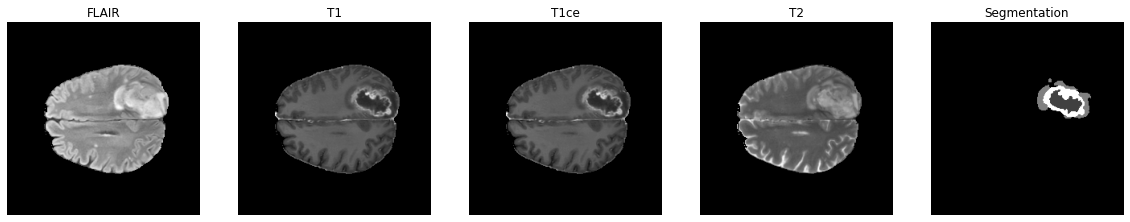

In [108]:
import matplotlib.pyplot as plt

# Check the shape of the loaded data
print(f"Shape of Input_Data[1]: {Input_Data[1].shape}")

sample_data = Input_Data[1] 
slice_index = 100 

print(f"Max slice index: {sample_data.shape[0] - 1}")

# Extract each modality for the correct slice
flair_slice = sample_data[slice_index, :, :, 0]  # FLAIR
t1_slice = sample_data[slice_index, :, :, 1]  # T1
t1ce_slice = sample_data[slice_index, :, :, 2]  # T1ce
t2_slice = sample_data[slice_index, :, :, 3]  # T2
segmentation_slice = sample_data[slice_index, :, :, 4]  # Segmentation

# Verify the shape of each slice
print(f"FLAIR slice shape: {flair_slice.shape}")
print(f"T1 slice shape: {t1_slice.shape}")
print(f"T1ce slice shape: {t1ce_slice.shape}")
print(f"T2 slice shape: {t2_slice.shape}")
print(f"Segmentation slice shape: {segmentation_slice.shape}")

# Plot all modalities
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
axes[0].imshow(flair_slice, cmap='gray')
axes[0].set_title('FLAIR')
axes[0].axis('off')

axes[1].imshow(t1_slice, cmap='gray')
axes[1].set_title('T1')
axes[1].axis('off')

axes[2].imshow(t1ce_slice, cmap='gray')
axes[2].set_title('T1ce')
axes[2].axis('off')

axes[3].imshow(t2_slice, cmap='gray')
axes[3].set_title('T2')
axes[3].axis('off')

axes[4].imshow(segmentation_slice, cmap='gray')
axes[4].set_title('Segmentation')
axes[4].axis('off')

plt.show()


**Implementation of Attention based Unet**

![Unet](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

The architecture presented is attention based U-Net model, a popular deep learning framework for image segmentation tasks. This model utilizes an encoder-decoder structure with skip connections to achieve precise spatial localization. The encoder path consists of sequential convolutional layers followed by max-pooling to progressively capture features at different resolutions. The decoder path mirrors the encoder, employing upsampling layers to restore the spatial dimensions while refining feature maps. 

A key feature of this model is the integration of attention gates, which enhance the learning process by selectively focusing on relevant regions of the feature maps. These gates operate by combining information from the encoder's feature maps and the decoder's intermediate outputs, ensuring the network emphasizes critical areas for segmentation.

Additionally, skip connections bridge the encoder and decoder, facilitating the transfer of high-resolution features. The model concludes with a final convolutional layer using a sigmoid activation to produce the segmentation output. This design enables efficient and accurate segmentation, particularly in medical imaging applications like tumor detection.

In [16]:

# Attention gate function
def attention_gate(x, g, inter_shape):
    # Convolution on the input feature map
    f = Conv2D(inter_shape, (1, 1), padding='same')(x)
    f = BatchNormalization()(f)
    f = Activation('relu')(f)
    
    # Convolution on the gating signal
    g = Conv2D(inter_shape, (1, 1), padding='same')(g)
    g = BatchNormalization()(g)
    g = Activation('relu')(g)
    
    # Add the results
    combined = Add()([f, g])  # Add() is used to combine the feature map and gating signal
    combined = Activation('relu')(combined)
    
    # Final convolution
    result = Conv2D(1, (1, 1), padding='same', activation='sigmoid')(combined)
    
    return result

def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding='same', strides=(1, 1))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def model(input_shape):
    inputs = Input(input_shape)
    
    conv_1 = Convolution(inputs, 32)
    maxp_1 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv_1)
    
    conv_2 = Convolution(maxp_1, 64)
    maxp_2 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv_2)
    
    conv_3 = Convolution(maxp_2, 128)
    maxp_3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv_3)
    
    conv_4 = Convolution(maxp_3, 256)
    maxp_4 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same')(conv_4)
    
    conv_5 = Convolution(maxp_4, 512)
    upsample_6 = UpSampling2D((2, 2))(conv_5)
    
    conv_6 = Convolution(upsample_6, 256)
    upsample_7 = UpSampling2D((2, 2))(conv_6)
    
    # Add attention gate between skip connection (conv_4 and conv_6)
    attention_6 = attention_gate(conv_4, conv_6, 128)
    
    # Upsample attention_6 to match the size of upsample_7
    attention_6_upsampled = UpSampling2D((2, 2))(attention_6)
    
    # Concatenate with the upsampled version of attention_6
    upsample_7 = concatenate([upsample_7, attention_6_upsampled])
    
    conv_7 = Convolution(upsample_7, 128)
    upsample_8 = UpSampling2D((2, 2))(conv_7)
    
    conv_8 = Convolution(upsample_8, 64)
    upsample_9 = UpSampling2D((2, 2))(conv_8)
    
    upsample_9 = concatenate([upsample_9, conv_1])
    
    conv_9 = Convolution(upsample_9, 32)
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv_9)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    
    return model


In [17]:
data_shape = (240, 240, 1)  
model = model(data_shape)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 240, 240, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 240, 240, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 240, 240, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 240, 240, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

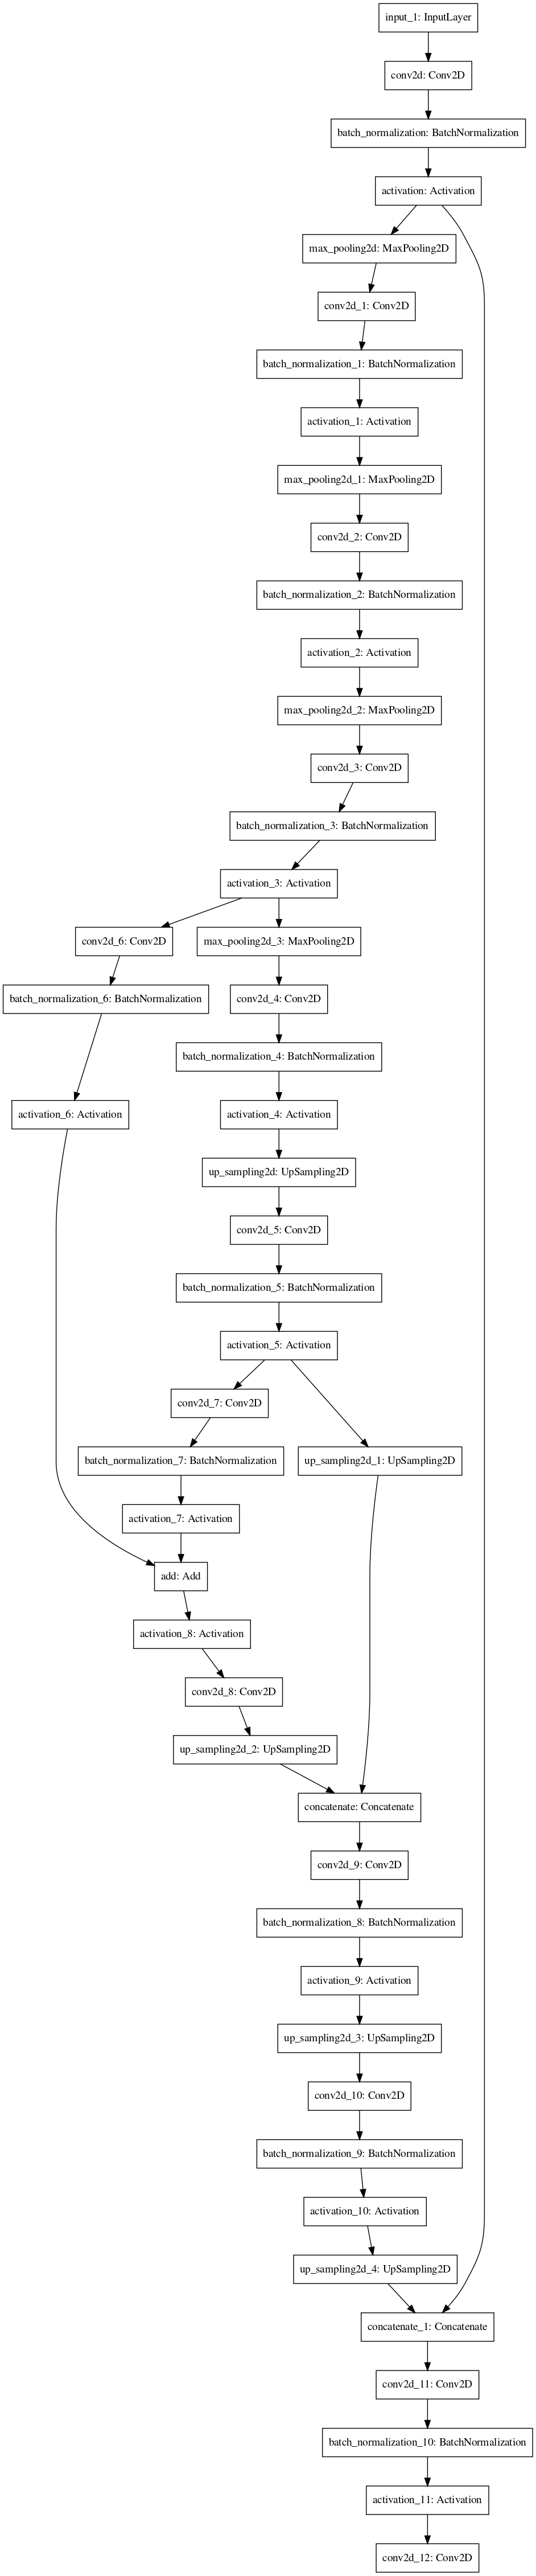

In [69]:
from keras.utils import plot_model

# Save the model plot with a smaller dpi value (e.g., dpi=50)
plot_model(model, to_file='/kaggle/working/model.png', dpi=100)


In [19]:
Adam=optimizers.Adam(lr=0.001)

In [20]:
def intersection_over_union(true_labels, predicted_labels):
    intersect = K.sum(K.round(K.clip(true_labels * predicted_labels, 0, 1)))
    union = K.sum(K.round(K.clip(true_labels, 0, 1))) + K.sum(K.round(K.clip(predicted_labels, 0, 1))) - intersect
    return intersect / (union + K.epsilon())

In [21]:
# Computing Dice Similarity Coefficient
def dice_similarity(true_labels, predicted_labels, smooth_factor=1.0):
    true_labels_flat = K.flatten(true_labels)
    predicted_labels_flat = K.flatten(predicted_labels)
    intersect = K.sum(true_labels_flat * predicted_labels_flat)
    return (2. * intersect + smooth_factor) / (K.sum(true_labels_flat) + K.sum(predicted_labels_flat) + smooth_factor)


In [22]:
# Computing Precision
def calc_precision(true_labels, predicted_labels):
    true_positives = K.sum(K.round(K.clip(true_labels * predicted_labels, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(predicted_labels, 0, 1)))
    precision_val = true_positives / (predicted_positives + K.epsilon())
    return precision_val

In [23]:
# Computing Sensitivity
def calc_sensitivity(true_labels, predicted_labels):
    true_positives = K.sum(K.round(K.clip(true_labels * predicted_labels, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(true_labels, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

In [24]:
# Computing Specificity
def calc_specificity(true_labels, predicted_labels):
    true_negatives = K.sum(K.round(K.clip((1 - true_labels) * (1 - predicted_labels), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - true_labels, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())


In [25]:
# Compiling the model 
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy',dice_similarity,calc_precision,calc_sensitivity,calc_specificity,intersection_over_union])

In [26]:
# Training the model
training_results = model.fit(X_train, Y_train,
                            batch_size=32, 
                            epochs=40, 
                            validation_split=0.20,
                            verbose=1)

Epoch 1/40
99/99 [==============================] - 22s 226ms/step - loss: 0.2118 - accuracy: 0.9656 - dice_similarity: 0.0988 - calc_precision: 1373838592.0000 - calc_sensitivity: 0.6534 - calc_specificity: 0.9765 - intersection_over_union: 1.0577 - val_loss: 0.1862 - val_accuracy: 0.9819 - val_dice_similarity: 0.0956 - val_calc_precision: 1.3909 - val_calc_sensitivity: 0.5436 - val_calc_specificity: 0.9929 - val_intersection_over_union: 0.5098
Epoch 2/40
99/99 [==============================] - 20s 205ms/step - loss: 0.0945 - accuracy: 0.9823 - dice_similarity: 0.1853 - calc_precision: 3044848128.0000 - calc_sensitivity: 0.6109 - calc_specificity: 0.9930 - intersection_over_union: 0.6135 - val_loss: 0.0808 - val_accuracy: 0.9805 - val_dice_similarity: 0.2373 - val_calc_precision: 0.6553 - val_calc_sensitivity: 0.7382 - val_calc_specificity: 0.9909 - val_intersection_over_union: 0.5258
Epoch 3/40
99/99 [==============================] - 20s 204ms/step - loss: 0.0673 - accuracy: 0.9788

In [28]:
# Evaluation of the trained model on test data
model.evaluate(x=X_test, y=Y_test, batch_size=32, verbose=1, sample_weight=None, steps=None)

22/22 [==============================] - 2s 79ms/step - loss: -0.1992 - accuracy: 0.9897 - dice_similarity: 1.3091 - calc_precision: 0.9113 - calc_sensitivity: 0.9722 - calc_specificity: 0.9988 - intersection_over_union: 0.8882


[-0.1992063969373703,
 0.9897337555885315,
 1.3091015815734863,
 0.9113056063652039,
 0.9722068309783936,
 0.9987947344779968,
 0.8881853222846985]

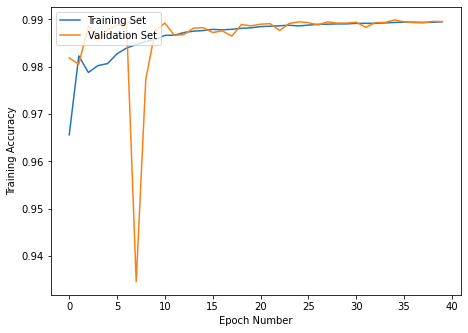

In [29]:
# Accuracy vs Epoch
def plot_accuracy_vs_epoch(training_results):
    plt.plot(training_results.history['accuracy'])
    plt.plot(training_results.history['val_accuracy'])
    #plt.title('Model accuracy')
    plt.ylabel('Training Accuracy')
    plt.xlabel('Epoch Number')
    plt.legend(['Training Set', 'Validation Set'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()

plot_accuracy_vs_epoch(training_results)


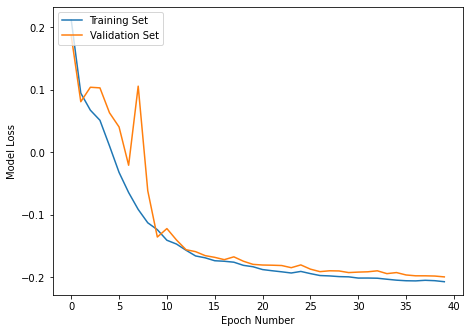

In [30]:
# Loss vs Epoch
def plot_loss_vs_epoch(training_results):
    plt.plot(training_results.history['loss'])
    plt.plot(training_results.history['val_loss'])
    #plt.title('Model loss')
    plt.ylabel('Model Loss')
    plt.xlabel('Epoch Number')
    plt.legend(['Training Set', 'Validation Set'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()

plot_loss_vs_epoch(training_results)


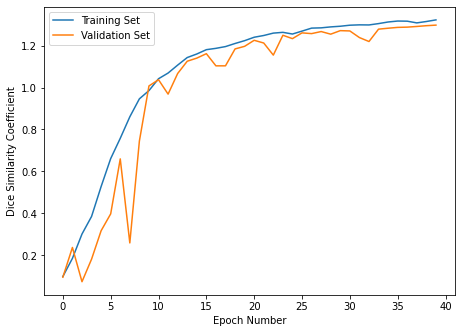

In [32]:
# Dice Similarity Coefficient vs Epoch
def plot_dice_coefficient_vs_epoch(training_results):
    plt.plot(training_results.history['dice_similarity'])
    plt.plot(training_results.history['val_dice_similarity'])
    #plt.title('Dice_Coefficient')
    plt.ylabel('Dice Similarity Coefficient')
    plt.xlabel('Epoch Number')
    plt.legend(['Training Set', 'Validation Set'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()

plot_dice_coefficient_vs_epoch(training_results)


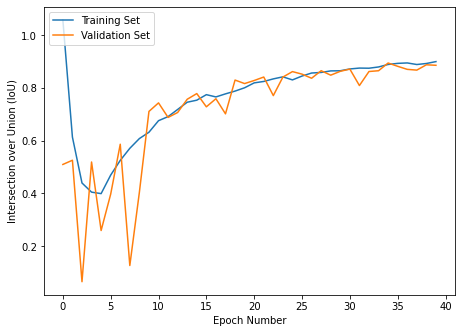

In [33]:
# IoU vs Epoch
def plot_iou_vs_epoch(training_results):
    plt.plot(training_results.history['intersection_over_union'])
    plt.plot(training_results.history['val_intersection_over_union'])
    #plt.title('IoU')
    plt.ylabel('Intersection over Union (IoU)')
    plt.xlabel('Epoch Number')
    plt.legend(['Training Set', 'Validation Set'], loc='upper left')
    plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.show()

plot_iou_vs_epoch(training_results)


In [66]:
model.save('./BraTs2020_Unet.h5')

In [67]:
model.save('/kaggle/working/BraTs2020_Unet.h5')


In [35]:
model.load_weights('./kaggle/working/BraTs2020_Unet.h5')

In [36]:
X_train=X_test=Y_train=Y_test=0

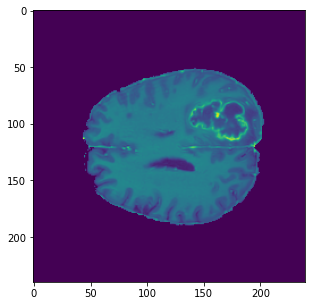

In [37]:
fig = plt.figure(figsize=(5, 5))  
image_slice = TR_data[250, :, :] 
image_plot = plt.imshow(image_slice)
plt.show()  


In [38]:
predicted_tumor = model.predict(TR_data)

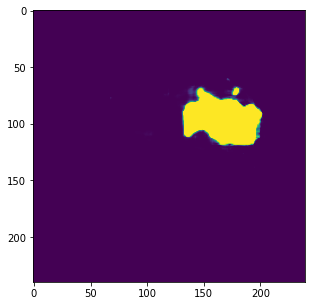

In [39]:
fig = plt.figure(figsize=(5, 5)) 
predicted_image = predicted_tumor[250, :, :, 0]  
image_plot = plt.imshow(predicted_image)  
plt.show()  


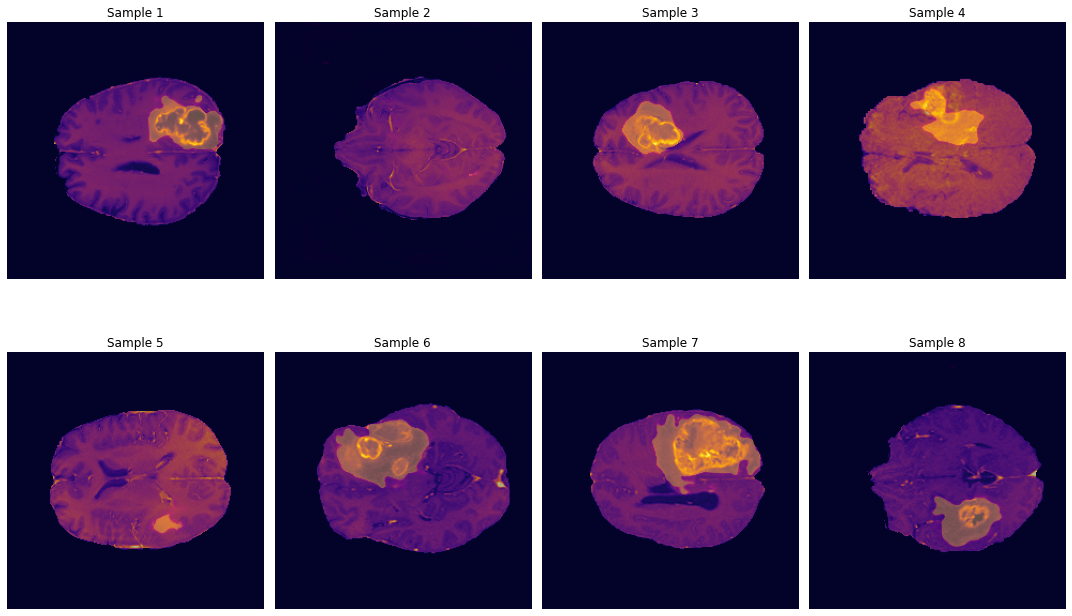

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 10))

# Define sample indices for visualization
sample_indices = [250, 370, 400, 540, 850, 1450, 2570, 60]

for idx, sample_idx in enumerate(sample_indices):
    plt.subplot(2, 4, idx + 1) 
    plt.title(f'Sample {idx + 1}')
    plt.axis('off')
    
    # Display the base image (T1 contrast or other modality)
    plt.imshow(np.squeeze(TR_data[sample_idx, :, :]), cmap='inferno')
    
    # Display the predicted tumor image (T1 contrast or other modality)
    plt.imshow(np.squeeze(predicted_tumor[sample_idx, :, :]), alpha=0.3, cmap='plasma')

plt.tight_layout()  
plt.show()
